In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

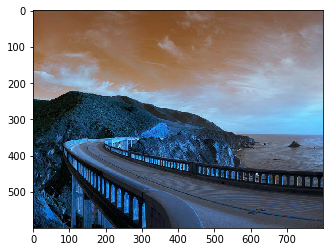

In [35]:
road = cv2.imread('../../notebooks/DATA/road_image.jpg')
plt.imshow(road)

In [36]:
road_copy = np.copy(road)

In [37]:
road_copy.shape

(600, 800, 3)

In [38]:
marker_image = np.zeros(road.shape[:2], dtype=np.int32)
segments = np.zeros_like(road, dtype=np.uint8)

print(marker_image.shape)
print(segments.shape)

(600, 800)
(600, 800, 3)


In [39]:
# USING 'matplotlib' COLOR MAPPINGS TO GET DISTINGUISH COLORS FOR CUSTOM MARKERS.
# Ref - https://matplotlib.org/tutorials/colors/colormaps.html.
# "tab10" has 10 colors, each given by its own index.
cm.tab10(0)
# This return a tuple consist of (RED, GREEN, BLUE, ALPHA_PARAMETER), which RGB scaled down
# between 0 - 1.

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [40]:
# Scale up "tab10" colors to be between 0 - 255 and map them to numpy array.
tuple(np.array(cm.tab10(1)[:3]) * 255)
# Since we are using OpenCV to show the image, RGB should transpose to BGR. But, as we need just
# distinguished colors, that's no need.

(255.0, 127.0, 14.0)

In [41]:
def create_rgb(i):
    return tuple((np.array(cm.tab10(i)[:3]) * 255))

In [42]:
colors = []

for i in range(10):
    colors.append(create_rgb(i))

colors


[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [45]:
road_copy = np.copy(road)
# GLOBAL VARIABLE.
# COLOR CHOICE.
current_marker = 1
# MARKERS UPDATED BY WATERSHED.
marker_updated = False
# Number of markers (number of distinct colors)
n_markers = 10

# CALLBACK FUNCTION.
def mouse_clicked(event, x, y, flags, params):
    global marker_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        # This is the markers pass to the WATERSHED ALGORITHM.
        cv2.circle(marker_image,
                   center=(x, y),
                   radius=10,
                   color=current_marker,
                   thickness=-1)

        # Users see on the road image.
        cv2.circle(road_copy,
                   center=(x, y),
                   radius=10,
                   color=colors[current_marker],
                   thickness=-1)

        marker_updated = True

cv2.namedWindow('road_image')
cv2.setMouseCallback('road_image', mouse_clicked)

while True:

    cv2.imshow('watershed_segments', segments)
    cv2.imshow('road_image', road_copy)

    k = cv2.waitKey(1)

    # Break the loop on Esc press.
    if k == 27:
        break
    # Clear out the image on 'c' press.
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[:2], dtype=np.int32)
        segments = np.zeros_like(road, dtype=np.uint8)
    # Update the current color value.
    elif k > 0 and chr(k).isdigit():
        current_marker = int(chr(k))


    if marker_updated:
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)

        segments = np.zeros_like(road, dtype=np.uint8)

        for color_idx in range(n_markers):
            # Coloring segments, numpy call.
            segments[marker_image_copy==color_idx] = colors[color_idx]

cv2.destroyAllWindows()